<a href="https://colab.research.google.com/github/Aatika1/openai-API/blob/main/LangGraph_tutorial_krish_naik_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LangGraph:**
LangGraph is a library for building stateful,multi-actor applications with LLMs,used to create agent and multi agents workflows, compare to other LLMs frameworks, it offers these core benefits: cycle controllability, and persistance. LangGraph allow you to define flows that involves cycles, essential for most agentic architectures, differentiating it from DAG-based solutions    


#**Agenda**


1.   what is LangGraph
2.   why langGraph

1.   Getting started with langGraph






#**Why langGraph:**
amazing benefits

1.   Simplifies development: state management and agent cordination
       
       chatbot

       1agent ----->google search
        
      2agent ----->wikipedia search    =>    {state mangement}

      3agent ----->vector DB search    =>   {agent cordination=mean comunication b/w this kind of agents}   


      as developer we need define [workflow and logic]  

2.flexibility:
with a langGraph developers have the flexibility to define their own agent logic and communication protocols. This allows for highly customized applications tailored to specific use cases. Whether you need a chatbot that can handle various types of user requests or multi-agent system that perform complex tasks,LangGraph provides the tools to build exactly  what you need.It's all about what you need giving you the power to create.

3.Scalability

we can actually build large scale multi-agents applications

(it can handle high volume of interactions) iteraction can be b/w agents and complex workflow

4.fault tolerance ▶ handle error ,fault tolerance
            
            ther core feature that reliablity









#Chatbots with LangGraph

In [36]:
!pip install langgraph langsmith

In [37]:
!pip install langchain langchain_groq langchain_community

In [38]:
from google.colab import userdata
groq_api_key = userdata.get("groq_api_key")
langsmith=userdata.get("LANGCHAIN_API_KEY")
print(langsmith)
print(groq_api_key)

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
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


In [39]:
import os
os.environ["LANGCHAIN_API_KEY"]=langsmith
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]="chatbot creationg"


In [40]:
from langchain_groq import ChatGroq

In [41]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7deb5dddc130>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7deb5dddf9a0>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

#Start Building Chatbot Using LangGraph

In [42]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [43]:
class State(TypedDict):
  #Messages have type "list" 'the add_messages' function
  #in the annotiation defines how it state key should be updated
  #(in this case,it append messages to the list, rather than overwriting them)
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)

In [44]:
graph_builder

In [45]:
def chatbot(state:State):
  return {"messages":llm.invoke(state["messages"])}

In [46]:
graph_builder.add_node("chatbot",chatbot)

In [47]:
graph_builder.add_edge(START,"chatbot")

In [18]:
graph_builder.add_edge("chatbot",END)

In [48]:
graph=graph_builder.compile()

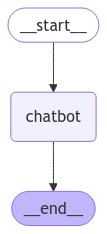

In [25]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass

In [50]:
while True:
  user_input=input("Abuzar: ")
  if user_input.lower() in ["quit","q","exit"]:
    print("Nice to meet you")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("AI Agent:",value["messages"].content)

Abuzar: hi
dict_values([{'messages': AIMessage(content='Hello! 👋 How can I help you today?\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 10, 'total_tokens': 23, 'completion_time': 0.023636364, 'prompt_time': 3.8e-07, 'queue_time': 0.013127749000000001, 'total_time': 0.023636744}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-f1e6a91c-9e51-45be-8e75-30d4dd82bdfa-0', usage_metadata={'input_tokens': 10, 'output_tokens': 13, 'total_tokens': 23})}])
content='Hello! 👋 How can I help you today?\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 10, 'total_tokens': 23, 'completion_time': 0.023636364, 'prompt_time': 3.8e-07, 'queue_time': 0.013127749000000001, 'total_time': 0.023636744}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-f1e6a91c-9